## Задание №1

In [148]:
import numpy as nmp
from sklearn import datasets, neighbors
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

Генерируем выборку - 2 признака, 3 класса.

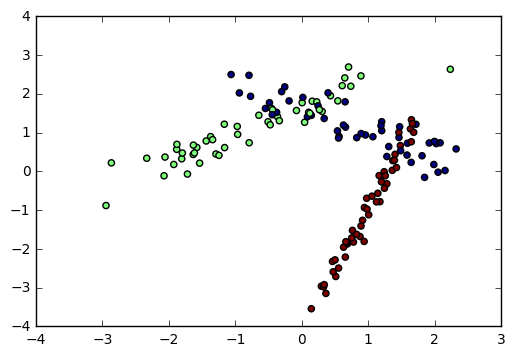

In [160]:
#X, Y = datasets.make_classification(n_samples=150, n_features =2, n_classes = 3, n_redundant=0, 
#                                                      n_clusters_per_class=1, random_state=3)

#plt.scatter(X[0], X[1], c = Y)

X, Y = datasets.make_classification(n_samples = 150, n_features=2, n_redundant=0,
                             n_clusters_per_class=1, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=Y)

Функции, которые будут визуализировать разделяющие поверхности.

Здесь мы пользуемся методом k ближайших соседей без кросс-валидации.

In [161]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(num_neigh, clf, train_data, train_labels, test_data, test_labels,
                          colors = colors, light_colors = light_colors):
    print("number of neighbors = ", num_neigh)
    
    # обучаем модель
    clf.fit(train_data, train_labels)
    
    pyplot.figure(figsize = (16, 6))
    
    # разделяющие поверхности для обучающей выборки 
    xx, yy = get_meshgrid(train_data)
    pyplot.subplot(1,2,1)
    mesh_predictions = np.array(clf.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 50, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, clf.predict(train_data))))
    
    # разделяющие поверхности для тестовой выборки
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 50, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, clf.predict(test_data))))
                         
    pyplot.show()

Построим разделяющие области для различных k.

number of neighbors =  2


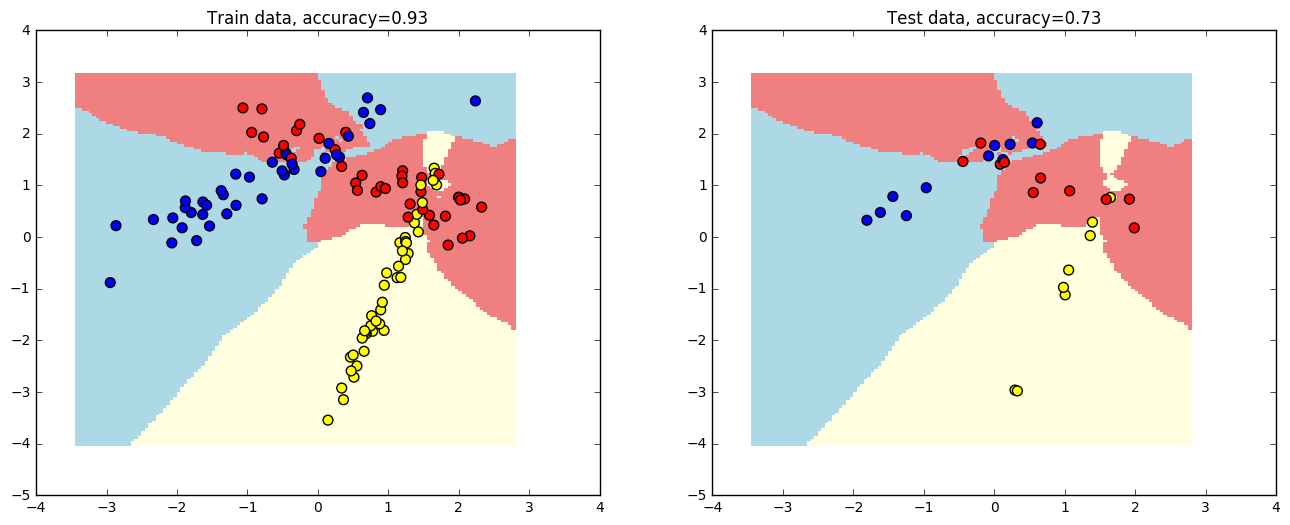

number of neighbors =  5


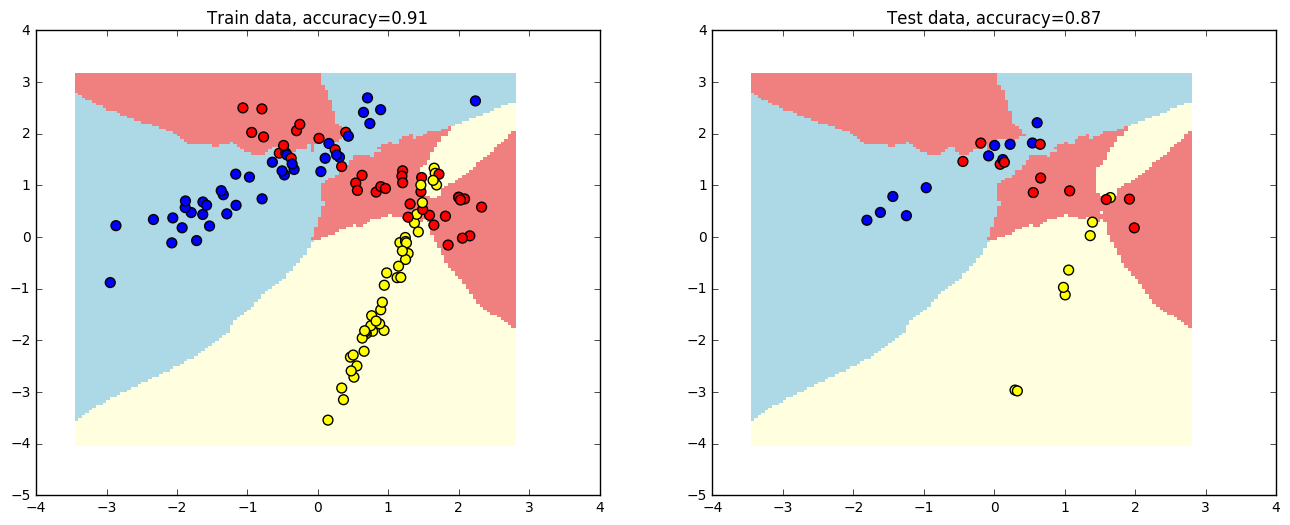

number of neighbors =  10


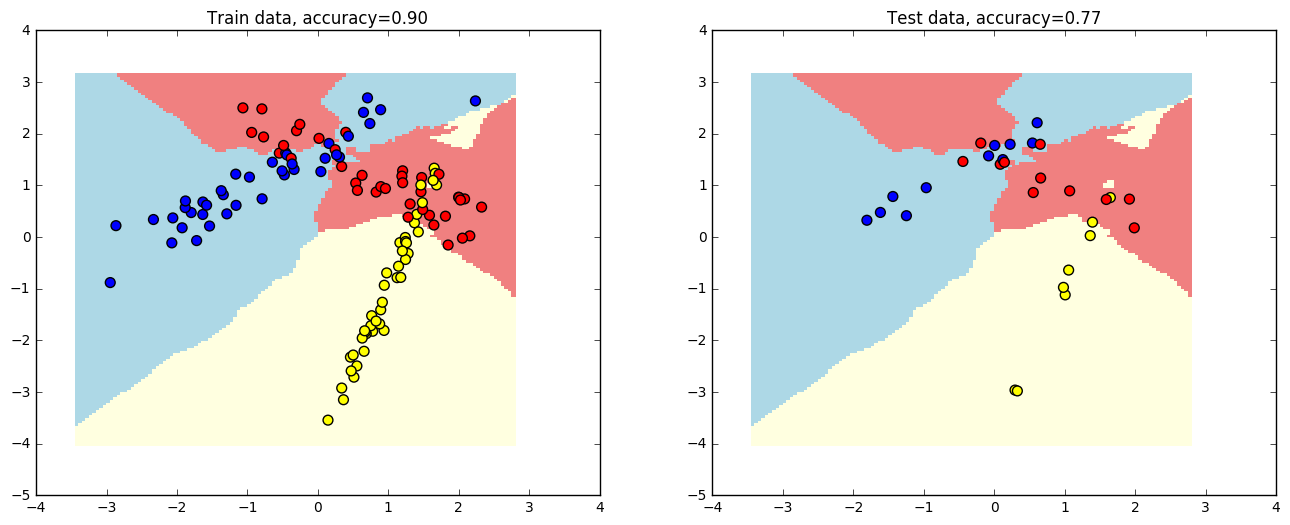

number of neighbors =  15


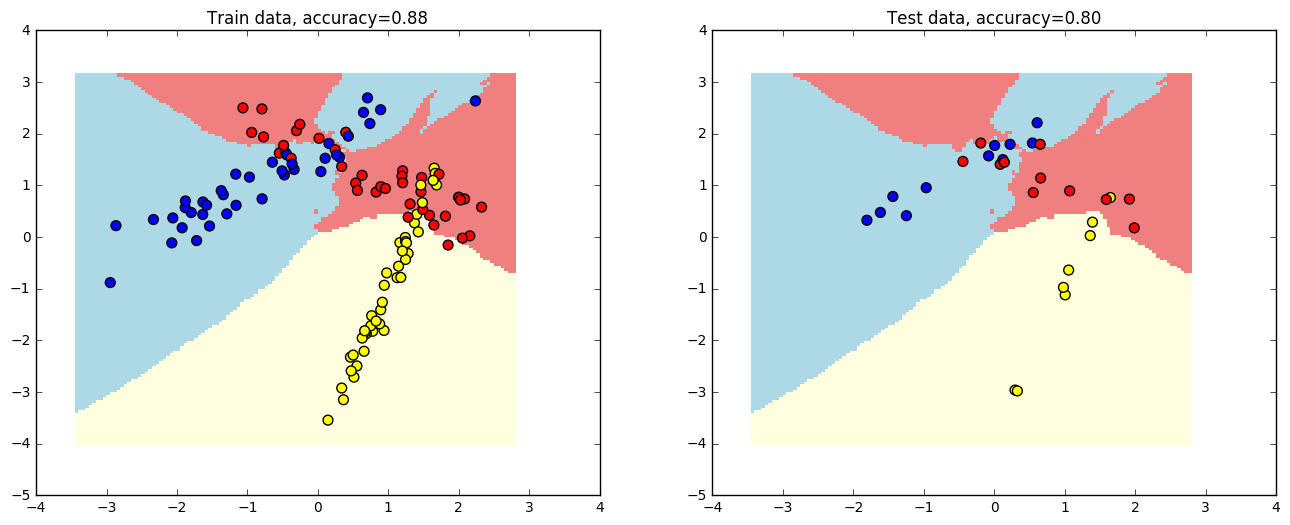

number of neighbors =  25


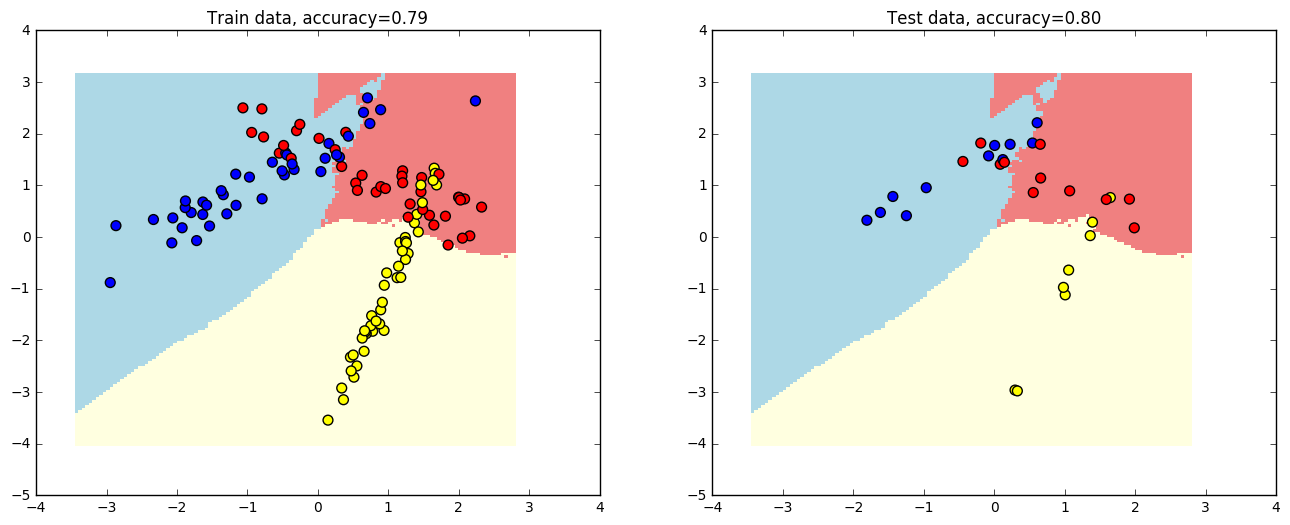

In [162]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(X, Y, 
                                                                                     test_size = 0.2,
                                                                                     random_state = 1)

k = [2, 5, 10, 15, 25]

for i in k:
    clf = neighbors.KNeighborsClassifier(n_neighbors = i)
    plot_decision_surface(i, clf, train_data, train_labels, test_data, test_labels)

Подберем точное значение kс помощью 5-fold cross-validation.

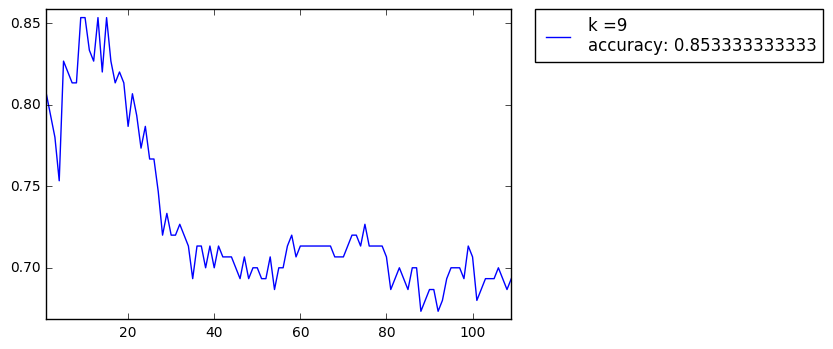

In [163]:
from sklearn.model_selection import cross_val_score

n_neigh = nmp.arange(1, 110, 1)
acc = []
for i in range(1, 110):
    clf = neighbors.KNeighborsClassifier(n_neighbors = i)
    acc.append(nmp.mean(cross_val_score(clf, X, Y, cv = 5)))
        
plt.plot(n_neigh, acc, label = ("k =" + str(acc.index(max(acc)) + 1) + "\n" + "accuracy: " + str(max(acc))))
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.axis([1, 109, min(acc) - 0.005, max(acc) + 0.005])
plt.show()

## Задание №2

In [7]:
import numpy as nmp
from sklearn import datasets
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.model_selection import cross_val_score

%matplotlib inline

Загружаем выборки.

Выводим первые строки, чтобы посмотреть, какие значения принимает массив признаков.

In [8]:
D = datasets.load_digits()
X_D = D.data
Y_D = D.target

BC = datasets.load_breast_cancer()
X_BC = BC.data
Y_BC = BC.target

print('digits: ')
print(X_D[:1])

print('breast_cancer')
print(X_BC[:1])

digits: 
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]]
breast_cancer
[[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
    1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
    2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
    8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
    5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
    2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
    1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
    4.60100000e-01   1.18900000e-01]]


### Результат

Digit - целые неотрицательные числа 

Breast_cancer - вещественные

### Обработка выборок

Обучаем выборки.

Функция cross_val_score считает точность для каждой из тестовой выборки в kross-validation. 

Поэтому, чтобы получить, одно значения для каждого способа - берем среднее.

In [9]:
nb_normal_D = GaussianNB()
nb_multi_D = MultinomialNB()
nb_bern_D = BernoulliNB()

nb_normal_D.fit(D.data, D.target)
nb_multi_D.fit(D.data, D.target)
nb_bern_D.fit(D.data, D.target)

nb_normal_BC = GaussianNB()
nb_multi_BC = MultinomialNB()
nb_bern_BC = BernoulliNB()

nb_normal_BC.fit(BC.data, BC.target)
nb_multi_BC.fit(BC.data, BC.target)
nb_bern_BC.fit(BC.data, BC.target)

acc_normal_D = nmp.mean(cross_val_score(nb_normal_D, D.data, D.target))
acc_multi_D = nmp.mean(cross_val_score(nb_multi_D, D.data, D.target))
acc_bern_D = nmp.mean(cross_val_score(nb_bern_D, D.data, D.target))

acc_normal_BC = nmp.mean(cross_val_score(nb_normal_D, BC.data, BC.target))
acc_multi_BC = nmp.mean(cross_val_score(nb_multi_BC, BC.data, BC.target))
acc_bern_BC = nmp.mean(cross_val_score(nb_bern_BC, BC.data, BC.target))

print('order: GaussianNB; MultinomialNB, BernoulliNB')
print()
print('digits: ')
print(acc_normal_D, acc_multi_D, acc_bern_D)
print('breast_cancer: ')
print(acc_normal_BC, acc_multi_BC, acc_bern_BC)

order: GaussianNB; MultinomialNB, BernoulliNB

digits: 
0.818600380355 0.870877148974 0.825823650778
breast_cancer: 
0.936749280609 0.894579040193 0.627420402859


### Ответы на вопросы:

1. Максимальное качество классификации на breast_cancer -- 0.94: GaussianNB
2. Максимальное качество классификации на digit --- 0.87: MultinomialNB
3. 
    1. На вещественных признаках лучше всего сработал наивный байесовсский классификатор с распределение Бернулли: нет, неверно
        
    2. На вещественных признаках лучше всего сработал наивный байесовсский классификатор с мультиномиальным распределением: нет, неверно
        
    3. Мультиномиальное распределение лучше всего показало себя на выборке с целыми неотрицательными значениями признаков: да, верно
        
    4. На вещественных признаках лучше всего сработало нормальное распределение: да, верно

## Задание №3

In [13]:
import numpy as nmp
import scipy as scp
import matplotlib.pyplot as plt
% matplotlib inline

Генерируем выборку из 500 точек. 

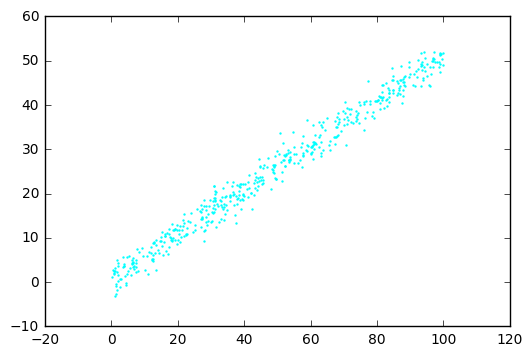

In [14]:
X = nmp.random.uniform(0, 100, 500)
X.sort()
eps = nmp.random.normal(0, 2, len(X))
Y = 0.5 * X + 1 + eps

plt.scatter(X, Y, s = 0.5, color = "aqua")
plt.show()

С помощью MSE находим коэффициенты b и k.

Выводим найденную прямую.

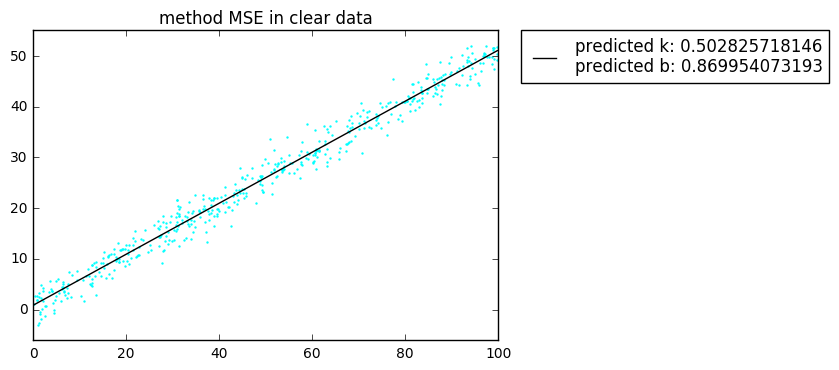

In [49]:
b,k = scp.optimize.minimize(lambda param: ((Y - (param[1] * X + param[0])) ** 2).mean(), [0, 0]).x

label1 = "predicted k: "
label2 = "predicted b: "

plt.scatter(X, Y, s = 0.5, color = "aqua")
plt.plot(X, (X * k + b), color = "black", label = (label1 + str(k) + "\n" + label2 + str(b)))
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.axis([0, 100, min(Y) - 3, max(Y) + 3])
plt.title("method MSE in clear data")
plt.show()

Генерируем ещё равномерно 75 точек так, чтобы они образовывали выбросы.

Объединяем их с начальным массивом.

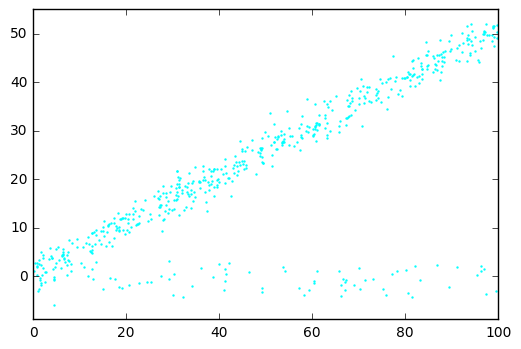

In [42]:
X_new = nmp.random.uniform(0, 100, 75)
eps = nmp.random.normal(0, 2, 75)
Y_new = -1 + eps

X_with_noise = nmp.concatenate((X, X_new))
Y_with_noise = nmp.concatenate((Y, Y_new))

plt.scatter(X_with_noise, Y_with_noise, s = 0.5, color = "aqua")
plt.axis([0, 100, min(Y_with_noise) - 3, max(Y_with_noise) + 3])
plt.show()

Находим параметры b и k методами MSE и MAE для выборки с выбросами.

Выводим найденные прямые.

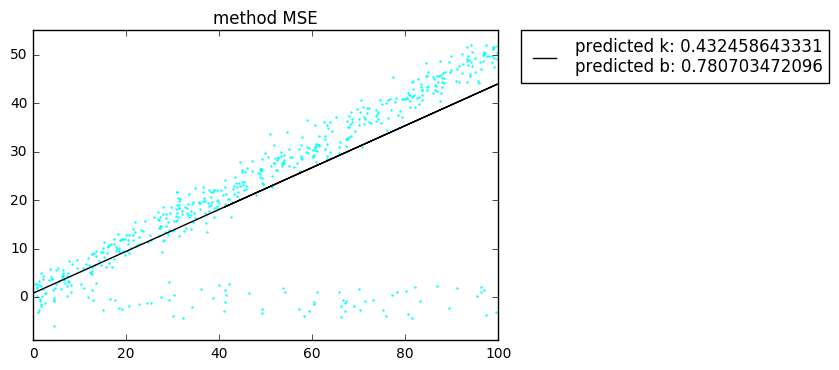

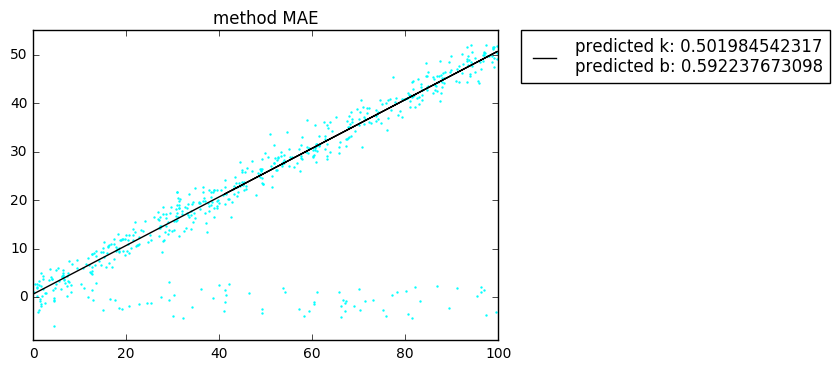

In [50]:
label1 = "predicted k: "
label2 = "predicted b: "

# MSE
b,k = scp.optimize.minimize(lambda param: ((Y_with_noise - (param[1] * X_with_noise + param[0])) ** 2).mean(), [0, 0]).x

label = label1 + str(k) + "\n" + label2 + str(b)

plt.scatter(X_with_noise, Y_with_noise, s = 0.5, color = "aqua")
plt.plot(X_with_noise, (X_with_noise * k + b), color = "black", label = (label1 + str(k) + "\n" + label2 + str(b)))
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.axis([0, 100, min(Y_with_noise) - 3, max(Y_with_noise) + 3])
plt.title("method MSE")
plt.show()


# MAE
b,k = scp.optimize.minimize(lambda param: (abs(Y_with_noise - (param[1] * X_with_noise + param[0]))).mean(), [0, 0]).x

plt.scatter(X_with_noise, Y_with_noise, s = 0.5, color = "aqua")
plt.plot(X_with_noise, (X_with_noise * k + b), color = "black", label = (label1 + str(k) + "\n" + label2 + str(b)))
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title("method MAE")
plt.axis([0, 100, min(Y_with_noise) - 3, max(Y_with_noise) + 3])
plt.show()

### Делаем вывод: MAE более устойчив к выбросам